### Exercise 1. 

For the Brock and Mirman model in use Uhlig’s notation to analytically find the values of the following matrices: F,G,H,L,M & N as functions of the parameters. Given these find the values of P & Q, also as functions of the parameters. Imposing our calibrated parameter values, plot the three-dimensional surface plot for the policy function K′ = H(K, z). Compare this with the closed form solution and the solution you found using the grid search method in exercise 8 from the DSGE chapter.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import var, exp, solve, lambdify
from scipy.optimize import root

α = 0.85
β = 0.9

K = (α*β)**(α-1)

F = α*K**(α-1)/(K**α - K)
G = -α*K**(α-1)*(α+K**(α-1))/(K**α -K)
H = α**2 * K**(2*(α-1))/(K**α -K)
L = -α*K**(2*α-1)/(K**α -K)
M = α**2 * K**(2*(α-1))/(K**α -K)
N = 0

P_1 = (-G +(G**2 - 4*F*H)**(0.5))/(2*F)
P_2 = (-G -(G**2 - 4*F*H)**(0.5))/(2*F)
P = P_1
Q = -(L*N +M)/(F*N+F*P+G)

K_t, z = var('K_t z')

K_prime = K+P*(K_t -K) + Q*z
K_prime_l = lambdify([K_t, z], K_prime, 'numpy')

In [4]:
print(K_prime)

0.85*K_t + 0.85*z + 0.156150019852992


In [10]:
K_t_array = np.linspace(.1, 50, 100)
z_t_array = np.random.uniform (-4, 4, 100)

K_t_mesh, z_t_mesh = np.meshgrid(K_t_array, z_t_array)
K_prime_mesh = K_prime_l(K_t_mesh, z_t_mesh)

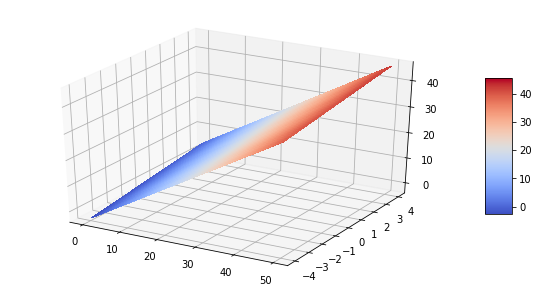

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(K_t_mesh, z_t_mesh, K_prime_mesh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Exercise 2

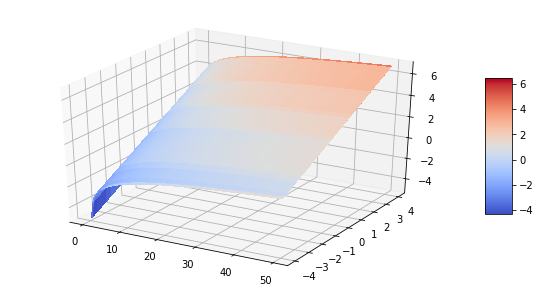

In [12]:
K_prime_new_mesh = K_prime_l(np.log(K_t_mesh), z_t_mesh)
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(K_t_mesh, z_t_mesh, K_prime_new_mesh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()